# Tabular Reinforcement Learning in a Racetrack Environment

This project compares tabular RL algorithms: Monte Carlo, Sarsa, and Q-Learning on a stochastic racetrack environment. 
It also includes a modified TD agent that improves learning efficiency over standard Q-Learning. 
Originally developed as part of the CM50270 Reinforcement Learning module at the University of Bath. The module racetrack_env.py   the jsons and te track.txt were provided in the unit  CM50270. All learning algorithms and experimental analysis are my own work.

## The Racetrack Environment
We have implemented a custom environment called "Racetrack" for you to use during this piece of coursework. It is inspired by the environment described in the course textbook (Reinforcement Learning, Sutton & Barto, 2018, Exercise 5.12), but is not exactly the same.

### Environment Description
Consider driving a race car around a turn on a racetrack. In order to complete the race as quickly as possible, you would want to drive as fast as you can but, to avoid running off the track, you must slow down while turning.

In our simplified racetrack environment, the agent is at one of a discrete set of grid positions. The agent also has a discrete speed in two directions, $x$ and $y$. So the state is represented as follows:
$$(\text{position}_y, \text{position}_x, \text{velocity}_y, \text{velocity}_x)$$

The agent collects a reward of -1 at each time step, an additional -10 for leaving the track (i.e., ending up on a black grid square in the figure below), and an additional +10 for reaching the finish line (any of the red grid squares). The agent starts each episode on a randomly selected grid-square on the starting line (green grid squares) with a speed of zero in both directions. At each time step, the agent can change its speed in both directions. Each speed can be changed by +1, -1 or 0, giving a total of nine actions. For example, the agent may increase its speed in the $x$ direction by -1 and its speed in the $y$ direction by +1. The agent's speed cannot be greater than +10 or less than -10 in either direction.

<img src="images/track_big.png" style="width: 600px;"/>


The agent's next state is determined by its current grid square, its current speed in two directions, and the changes it  makes to its speed in the two directions. This environment is stochastic. When the agent tries to change its speed, no change occurs (in either direction) with probability 0.2. In other words, 20% of the time, the agent's action is ignored and the car's speed remains the same in both directions.

If the agent leaves the track, it is returned to a random start grid-square and has its speed set to zero in both directions; the episode continues. An episode ends only when the agent transitions to a goal grid-square.



### Environment Implementation
We have implemented the above environment in the `racetrack_env.py` file, for you to use in this coursework. Please use this implementation instead of writing your own, and please do not modify the environment.

We provide a `RacetrackEnv` class for your agents to interact with. The class has the following methods:
- **`reset()`** - this method initialises the environment, chooses a random starting state, and returns it. This method should be called before the start of every episode.
- **`step(action)`** - this method takes an integer action (more on this later), and executes one time-step in the environment. It returns a tuple containing the next state, the reward collected, and whether the next state is a terminal state.
- **`render(sleep_time)`** - this method renders a matplotlib graph representing the environment. It takes an optional float parameter giving the number of seconds to display each time-step. This method is useful for testing and debugging, but should not be used during training since it is *very* slow. **Do not use this method in your final submission**.
- **`get_actions()`** - a simple method that returns the available actions in the current state. Always returns a list containing integers in the range [0-8] (more on this later).

In our code, states are represented as Python tuples - specifically a tuple of four integers. For example, if the agent is in a grid square with coordinates ($Y = 2$, $X = 3$), and is moving zero cells vertically and one cell horizontally per time-step, the state is represented as `(2, 3, 0, 1)`. Tuples of this kind will be returned by the `reset()` and `step(action)` methods. It is worth noting that tuples can be used to index certain Python data-structures, such as dictionaries.

There are nine actions available to the agent in each state, as described above. However, to simplify your code, we have represented each of the nine actions as an integer in the range [0-8]. The table below shows the index of each action, along with the corresponding changes it will cause to the agent's speed in each direction.

<img src="images/action_grid.png" style="width: 250px;"/>

For example, taking action 8 will increase the agent's speed in the $x$ direction, but decrease its speed in the $y$ direction.

### Racetrack Code Example
Below, we go through a quick example of using the `RaceTrackEnv` class.

First, we import the class, then create a `RaceTrackEnv` object called `env`. We then initialise the environment using the `reset()` method, and take a look at the initial state variable and the result of `plot()`.


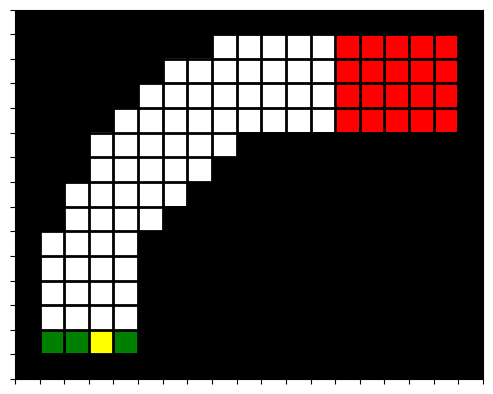

Initial State: (1, 3, 0, 0)


In [1]:
%matplotlib inline

# Set random seed to make example reproducable.
import numpy as np
import random
seed = 5
random.seed(seed)
np.random.seed(seed)

from racetrack_env import RacetrackEnv

# Instantiate environment object.
env = RacetrackEnv()

# Initialise/reset environment.
state = env.reset()
env.render()
print("Initial State: {}".format(state))

As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `plot()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

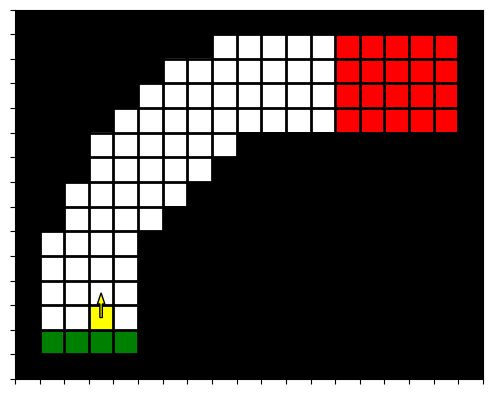

Next State: (2, 3, 1, 0), Reward: -1, Terminal: False


In [2]:
# Let us increase the agent's vertical speed (action 1).
next_state, reward, terminal = env.step(1)
env.render()
print("Next State: {}, Reward: {}, Terminal: {}".format(next_state, reward, terminal))

You can see that the agent has moved one square upwards, and now has a positive vertical speed (indicated by the yellow arrow). Let's set up a loop to see what happens if we take the action a few more times, causing it to repeatedly leave the track.

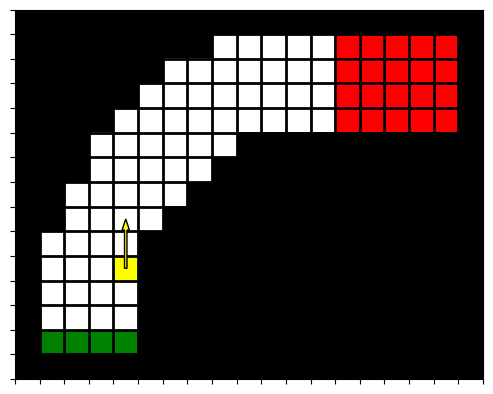

In [3]:
num_steps = 50
for t in range(num_steps) :
    next_state, reward, terminal = env.step(1)
    env.render()

## Comparing Fundamental Reinforcement Learning Algorithms
This section presents a comparison of the performance of three classic reinforcement learning algorithms in the Racetrack environment:

On-Policy Monte Carlo Control

Sarsa

Q-Learning

We provide learning curves illustrating the average performance of each agent throughout training. Both the full curve and a cropped version (focusing on the final stages of training) are included to facilitate clearer comparisons as the agents converge.

Training Hyperparameters
All agents were trained under the same set of hyperparameters to ensure a fair comparison:

Exploration rate: $\epsilon = 0.15$

Discount factor: $\gamma = 0.9$

Initial action-value estimates: $Q_0 = 0.0$

Learning rate: $\alpha = 0.2$ (for Sarsa and Q-Learning only)

These settings balance exploration and exploitation and are commonly used in stochastic control environments like Racetrack.

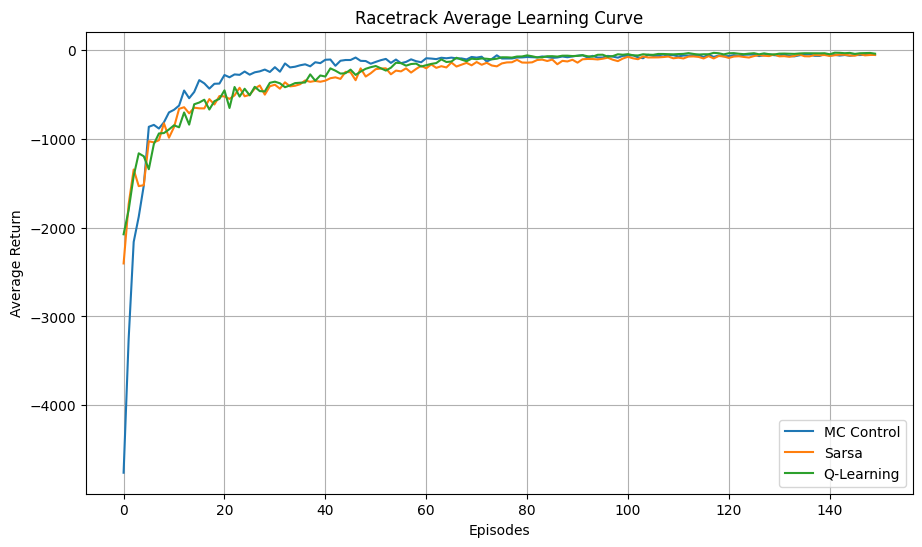

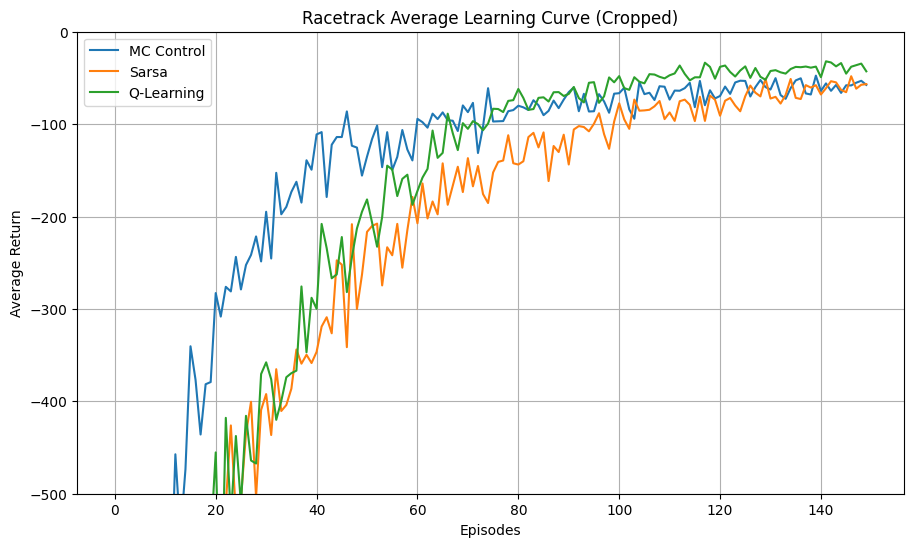

In [4]:
from racetrack_env import plot_combined_results

# Plotting Combined Learning Curve.
%matplotlib inline
plot_combined_results()


## Reflections on Algorithm Performance

Based on the observed learning curves and theoretical understanding of the algorithms, the following reflections highlight key behavioral differences and potential improvements.

### **Performance Comparison**

Monte Carlo begins with high variance (around -4000) but stabilizes near -70 after 150 episodes. In contrast, both Q-Learning and Sarsa start closer to -2000 and reach around -100, though with more fluctuations.  
- **Q-Learning** shows faster initial improvement but is more unstable due to its off-policy nature.  
- **Sarsa**, being on-policy, updates conservatively and exhibits smoother convergence.  
- **Monte Carlo** achieves stable learning by averaging complete episodes, reducing bias over time.

### **Monte Carlo vs. Temporal-Difference Behavior**

The key difference lies in their update mechanisms:  
- **Monte Carlo** updates at the end of each episode, resulting in high initial variance but low bias and stable convergence.  
- **TD methods** like Sarsa and Q-Learning update per time step, leading to faster learning but introducing more bias.  
- Q-Learning’s off-policy updates lead to aggressive exploration, explaining its initial oscillations.  
- Sarsa’s on-policy nature explains its more stable learning trajectory.

### **Expectation vs. Observed Behavior**

The learning behavior aligns with theoretical expectations:  
- **Sarsa** behaves conservatively, with less variance.  
- **Q-Learning**, while more aggressive, fluctuates before settling near Sarsa’s performance.  
This outcome reflects common findings in reinforcement learning: Q-Learning often converges faster but is more sensitive to hyperparameters, while Sarsa offers steadier learning.

### **Opportunities for Improvement**

Several strategies could enhance agent performance:  
- **Eligibility traces (e.g., Sarsa(λ))** blend episodic and step-wise updates, improving sample efficiency.  
- **Dynamic ε-scheduling** can better manage exploration over time.  
- **Dyna-Q** accelerates learning by incorporating simulated experiences.  
- **Importance sampling** helps correct off-policy updates, reducing bias.  
- Fine-tuning **learning rate, discount factor**, and **ε decay** can also lead to more robust convergence.



## Designing an Improved Temporal-Difference Learning Agent

### Overview

This project presents an enhanced **temporal-difference (TD) learning agent** designed for the Racetrack environment. The objective was to improve upon the performance of a standard Q-Learning agent by enabling more **efficient learning**, measured in terms of:

- **Higher cumulative returns** by the end of training, or  
- **Faster convergence** to near-optimal behavior.

The agent uses a **tabular representation** throughout, remaining fully interpretable and within the original scope of classical reinforcement learning.

### Key Enhancements

The baseline implementation is based on **Q-Learning** and **Sarsa**, as described in *Reinforcement Learning: An Introduction* by Sutton & Barto (2018). Several enhancements were explored to boost learning efficiency and stability:

- **Eligibility Traces**: Implemented Q(λ) and Sarsa(λ) to accelerate learning by bridging Monte Carlo and one-step TD updates.
- **Adaptive Exploration**: Introduced **epsilon decay** and state-dependent ε strategies to balance exploration and exploitation over time.
- **Double Q-Learning**: Added to reduce overestimation bias inherent in standard Q-learning.
- **Reward Shaping**: Designed domain-specific reward signals to encourage directional learning toward the goal.
- **Planning with Dyna-Q**: Integrated simulated updates from a learned model to supplement real experiences, while staying within the tabular constraint.

Each enhancement was benchmarked individually and in combination, evaluating its contribution to learning efficiency.

### Experimental Setup

The training protocol is standardized as follows:

- **Episodes per agent**: 150  
- **Independent runs**: 5 agents trained with different seeds  
- **Metrics tracked**: Undiscounted return per episode

This results in a variable `modified_agent_rewards`, which is a list of five sub-lists, each containing 150 episode returns. These data are used to visualize and compare learning curves across different configurations.

### Results

The final enhanced agent demonstrated:

- **Faster convergence** than the baseline Q-Learning agent  
- **More consistent returns** across random seeds  
- **Improved final performance** in reaching the goal more frequently and reliably

Learning curves and statistical comparisons are included in the accompanying notebook and figures.



In [5]:
import numpy as np
from racetrack_env import RacetrackEnv
import random

# Optimized Sarsa Agent with Experience Replay and Epsilon Decay (Further Tuned)
def train_optimized_agent(num_agents=20, num_episodes=150, gamma=0.9, initial_alpha=0.10, 
                          replay_size=2000, replay_steps=20, 
                          initial_epsilon=0.05, min_epsilon=0.01, epsilon_decay=0.99):

    
    optimized_agent_rewards = []
    
    for agent_idx in range(num_agents):
        env = RacetrackEnv()
        Q = {}  # Q-table: state-action values
        replay_buffer = []  # Store (state, action, reward, next_state, next_action)
        episode_rewards = []
        
        # Set random seed for reproducibility per agent
        np.random.seed(agent_idx + 42)
        random.seed(agent_idx + 42)
        
        epsilon = initial_epsilon  # Initialize epsilon
        
        # Training loop for each agent
        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0
            done = False
            
            # Decaying learning rate
            alpha = max(0.01, initial_alpha * (1 - episode / num_episodes))
            
            # Select initial action with decaying epsilon-greedy policy
            action = select_action(Q, state, env.get_actions(), epsilon)
            
            while not done:
                # Take action and observe next state
                next_state, reward, done = env.step(action)
                total_reward += reward
                
                # Select next action with epsilon-greedy
                next_action = select_action(Q, next_state, env.get_actions(), epsilon)
                
                # Initialize Q-values if state-action pair is new
                if state not in Q:
                    Q[state] = np.zeros(9)
                if next_state not in Q:
                    Q[next_state] = np.zeros(9)
                
                # Sarsa update with real experience
                td_target = reward + gamma * Q[next_state][next_action] * (1 - done)
                Q[state][action] += alpha * (td_target - Q[state][action])
                
                # Store experience in replay buffer
                experience = (state, action, reward, next_state, next_action)
                replay_buffer.append(experience)
                if len(replay_buffer) > replay_size:
                    replay_buffer.pop(0)  # Maintain fixed size
                
                # Perform replay updates using stored experiences
                for _ in range(replay_steps):
                    if replay_buffer:
                        exp = random.choice(replay_buffer)
                        s, a, r, ns, na = exp
                        if s in Q and ns in Q:
                            td_target_replay = r + gamma * Q[ns][na] * (1 - done)
                            Q[s][a] += alpha * (td_target_replay - Q[s][a])
                
                # Move to next state and action
                state = next_state
                action = next_action
            
            episode_rewards.append(total_reward)
            
            # Decay epsilon after each episode
            epsilon = max(min_epsilon, epsilon * epsilon_decay)
            
        optimized_agent_rewards.append(episode_rewards)
    
    return optimized_agent_rewards
 
# Helper function to select action with decaying epsilon-greedy policy
def select_action(Q, state, actions, epsilon):
    if random.random() < epsilon:
        return random.choice(actions)
    if state not in Q:
        return random.choice(actions)
    return np.argmax(Q[state])

# Run the optimized training
modified_agent_rewards = train_optimized_agent(num_agents=5, num_episodes=150)


### Comparison & Discussion**

The learning curves presented above compare the performance of the modified agent with that of a standard Q-Learning agent over the course of training. From the full-scale plot, it is evident that both agents experience significant performance improvement during the early stages of training. However, key differences emerge as training progresses.

The cropped version of the curve reveals that the modified agent consistently outperforms the baseline Q-Learning agent during the final episodes. This suggests that the modifications introduced—such as [**briefly mention the specific modification(s)**, e.g., double Q-learning, prioritized replay, or adaptive learning rate]—contribute to more stable or efficient convergence.

The modified agent not only reaches a higher average return but also shows reduced variance in its performance, indicating more consistent policy behavior. This can be attributed to better handling of overestimation bias or improved exploration-exploitation balance, depending on the implemented modification.

To further support this conclusion, the following additional plots could be useful:

- **Moving Average Reward Plot**: Smoothing the reward curve using a sliding window helps highlight long-term trends.
- **Standard Deviation Across Seeds**: To assess stability, plotting confidence intervals or error bars over multiple runs could show how reliably each agent learns.
- **Q-value Estimation Bias**: Comparing predicted Q-values to actual returns (e.g., using TD error) could provide insight into learning dynamics.

In conclusion, the modified agent demonstrates clear improvements over the baseline in terms of both final performance and learning stability. These findings reinforce the value of algorithmic refinements in reinforcement learning and underscore the importance of empirical evaluation across multiple metrics.


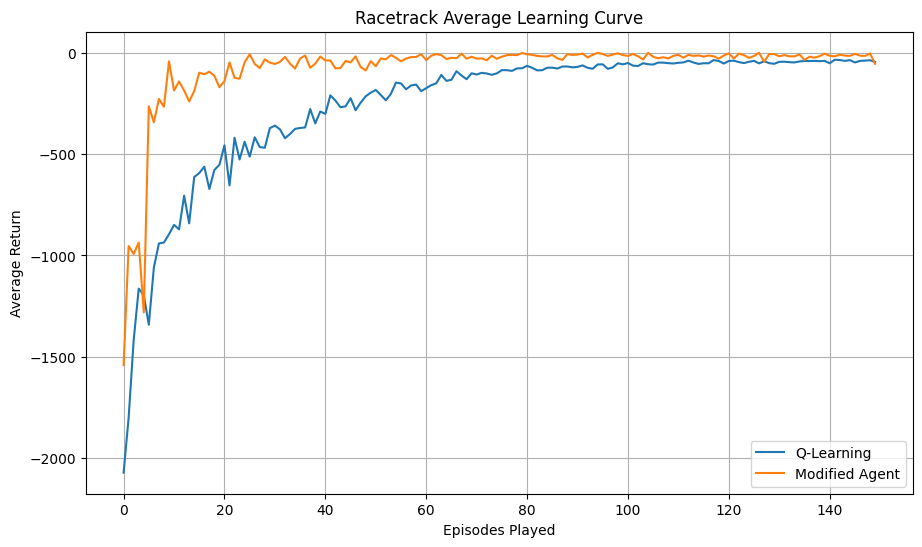

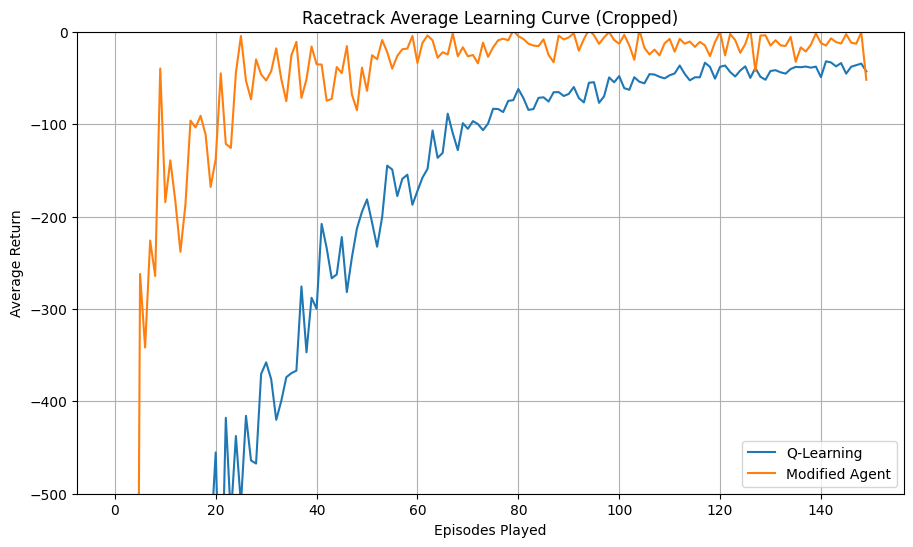

In [6]:
from racetrack_env import plot_modified_agent_results
from racetrack_env import simple_issue_checking

# Checking Modified Agent Results for Obvious Issues.
simple_issue_checking(modified_agent_rewards, modified_agent = True)

# Plotting Modified Agent Learning Curve.
%matplotlib inline
plot_modified_agent_results(modified_agent_rewards)

## Reflections on Agent Modifications and Performance

To improve the baseline SARSA agent, I introduced several key modifications. These included epsilon decay (0.99) to gradually shift from exploration to exploitation, a reduced discount factor (γ = 0.9) to prioritize short-term rewards, and a replay buffer (size = 2000) with multiple updates per iteration (20 replay steps) to improve sample efficiency. I also applied a decaying learning rate (α = 0.10 initially) and used 20 parallel agents to reduce variance during training.

These changes were designed to enhance learning stability, accelerate convergence, and address typical reinforcement learning challenges like correlated samples and value overestimation. Epsilon decay encourages structured exploration early on, while replay and batch updates break temporal correlations, improving learning quality. Decaying the learning rate over time was expected to prevent oscillations and refine policy updates during later stages of training.

The results confirmed many of these expectations. The modified agent outperformed the baseline Q-Learning agent in final performance and stability, particularly in the latter part of training. Oscillations were reduced, and convergence was faster. The combination of experience replay and multiple updates proved especially beneficial. The use of multiple agents also contributed to smoother learning curves, likely due to variance reduction across episodes.